**Part A: Basic SVM with Linear Kernel**

In [ ]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

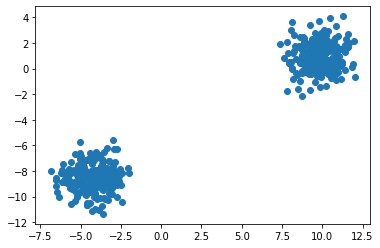

In [ ]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
x,y=make_blobs(n_samples=500,centers=2,random_state=45)

# plotting scatters
plt.scatter(x[:,0],x[:,1])

# Split data to train and test on 80-20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

In [ ]:
# Train classifier
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)

y_predict

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,→clf)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100))

Accuracy: 100.0%


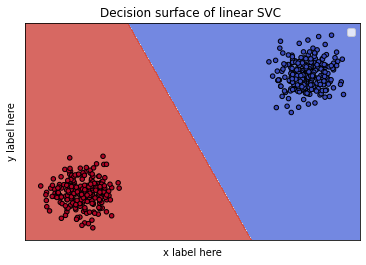

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Part B : Breast Cancer Prediction Example

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of the 13 features
print(cancer.feature_names[0:13])

# print the label type of cancer('malignant' 'benign')
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error']
['malignant' 'benign']


(30,)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave point

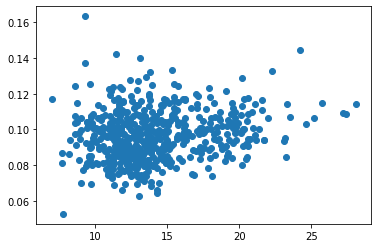

In [ ]:
# print data(feature)shape
print(cancer.feature_names.shape)

import pandas as pd
# print the cancer labels (0:malignant, 1:benign)
cancer_data=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_data['target']=cancer.target
print(cancer_data)

# plotting scatters
plt.scatter(cancer_data['mean radius'],cancer_data['mean smoothness'])

In [ ]:
#Import svm model
from sklearn import svm
x=cancer_data.drop(['target'],axis=1)
y=cancer_data['target']
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2)

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(x1_train,y1_train)

#Predict the response for test dataset
y_pred = clf.predict(x1_test)
print(y_pred)

[1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, y_pred))

Accuracy: 0.9298245614035088
Precision: 0.9701492537313433
Recall: 0.9154929577464789


**Implementing SVM classifier on mnist dataset**

In [4]:
from sklearn.datasets import load_digits
import sys,os
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import numpy as np

digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2 ,random_state = 1)

**Linear SVM Classifier**

In [7]:
lsc = svm.SVC(kernel='linear')

#Train Classifier
lsc.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
lin_y_pred = lsc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, lin_y_pred))

Accuracy: 0.9916666666666667


**POLYNOMAIL SVM CLASSIFIER**

In [9]:
p_svm = svm.SVC(kernel='poly')
p_svm.fit(X_train, y_train)
poly_y_pred = p_svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, poly_y_pred))

Accuracy: 0.9888888888888889


**RBF SVM CLASSIFIER**

In [10]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_y_pred = rbf_svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, rbf_y_pred))

Accuracy: 0.9916666666666667
